In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Part 1 - Predict delivery time using sorting time

In [2]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


High positive correlation between the two variables

### Changing the column names

In [4]:
data.columns = ['Delivery', 'Sorting']

In [5]:
data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Training the model

In [6]:
import statsmodels.formula.api as smf
model = smf.ols('Delivery~Sorting', data = data).fit()

### Checking the R-Squared value

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        12:24:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------------
R-squared value is lesser than the general target value which is 0.75

### Making predictions and calculating the RMSE value

In [8]:
pred = model.predict(data['Sorting'])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [9]:
# All the errors in the predictions
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [10]:
# Total error can be calculated using the rmse value - it should be less.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(data['Delivery'], pred))
rmse

2.7916503270617654

Text(0, 0.5, 'Delivery Time')

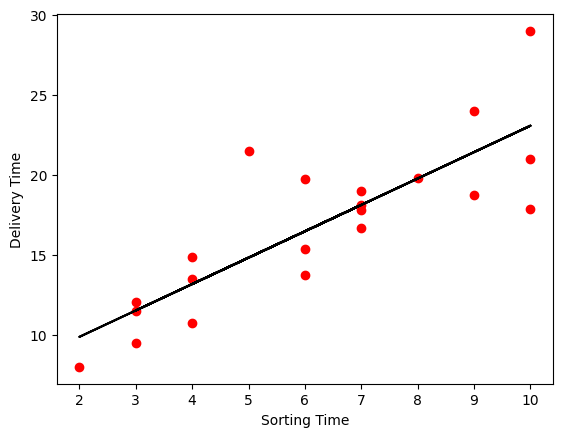

In [11]:
plt.scatter(data['Sorting'], data['Delivery'], color = 'red')
plt.plot(data['Sorting'], pred, color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

### Applying transformations to the data to improve r^2
1. Log transformations
2. exponential
3. sqrt
4. square
5. square root
6. cube root
7. cube root plus square root

### Log transformation
y = B0 + B1 * X

In [12]:
model2 = smf.ols('Delivery~np.log(Sorting)', data = data).fit()

In [13]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                        12:24:53   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------------
**Improved r-squared value of 0.695.**

In [14]:
pred2 = model2.predict(data['Sorting'])

In [15]:
rmse2 = np.sqrt(mean_squared_error(data['Delivery'], pred2))
rmse2

2.733171476682066

Text(0, 0.5, 'Delivery Time')

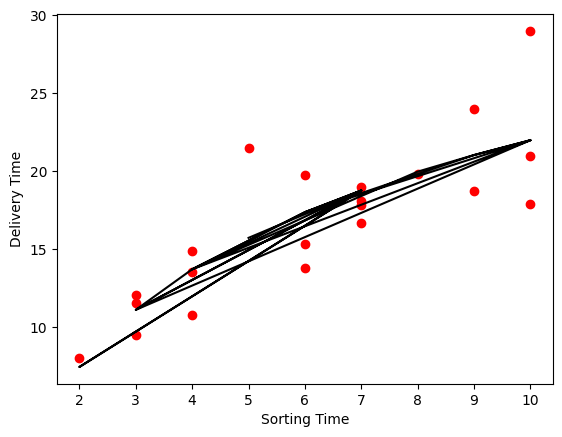

In [16]:
plt.scatter(data['Sorting'], data['Delivery'], color = 'red')
plt.plot(data['Sorting'], pred2, color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

### Exponential model
y = e^(B0 + B1 * X)

or

log(y) = B0 + B1 * X

In [17]:
model3 = smf.ols('np.log(Delivery)~Sorting', data = data).fit()

In [18]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.59e-06
Time:                        12:24:53   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Sorting        0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------
**Improved r-squared value of 0.711**

In [19]:
pred3 = model3.predict(data['Sorting'])
rmse3 = np.sqrt(mean_squared_error(data['Delivery'], np.exp(pred3)))
rmse3

2.940250323056201

Text(0, 0.5, 'Delivery Time')

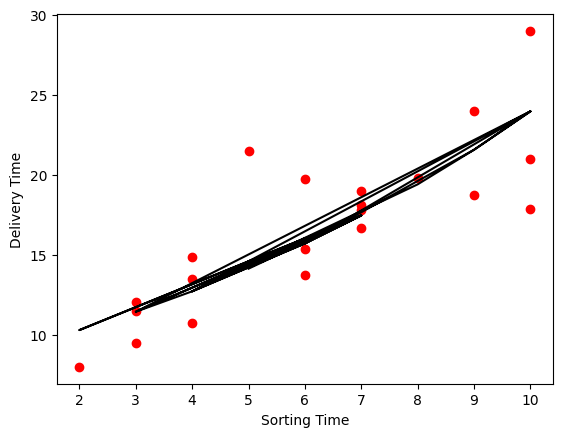

In [20]:
plt.scatter(data['Sorting'], data['Delivery'], color = 'red')
plt.plot(data['Sorting'], np.exp(pred3), color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

### Quadratic Log model

#### Adding a new column with the squared values of the Sorting column

In [21]:
data['Sorting_sq'] = data.Sorting * data.Sorting
data

,Delivery,Sorting,Sorting_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [22]:
model_quad = smf.ols('np.log(Delivery)~Sorting+Sorting_sq', data = data).fit()

In [23]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           2.20e-06
Time:                        12:24:53   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
Sorting        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------------
**This model has crossed the target r-squared value. The new value is 0.765**

In [24]:
pred4 = np.exp(model_quad.predict(data))
rmse4 = np.sqrt(mean_squared_error(data['Delivery'], pred4))
rmse4

2.799041988740925

Text(0, 0.5, 'Delivery Time')

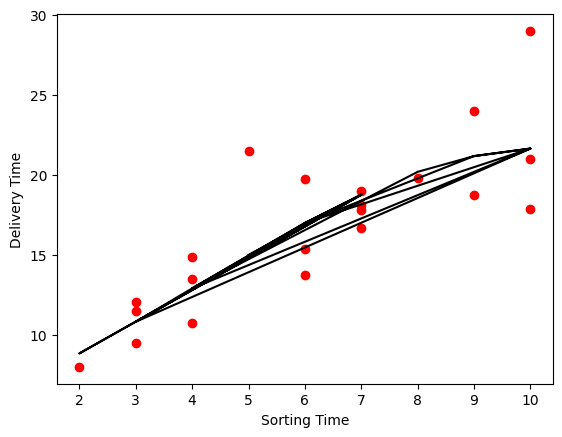

In [25]:
plt.scatter(data['Sorting'], data['Delivery'], color = 'red')
plt.plot(data['Sorting'], pred4, color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

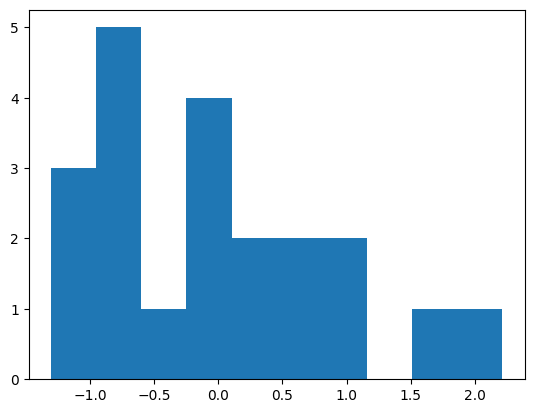

In [26]:
plt.hist(model_quad.resid_pearson)

(array([2., 2., 3., 2., 6., 2., 2., 1., 0., 1.]),
 array([-1.66402537, -1.25896163, -0.85389788, -0.44883414, -0.04377039,
         0.36129335,  0.7663571 ,  1.17142084,  1.57648459,  1.98154833,
         2.38661208]),
 <BarContainer object of 10 artists>)

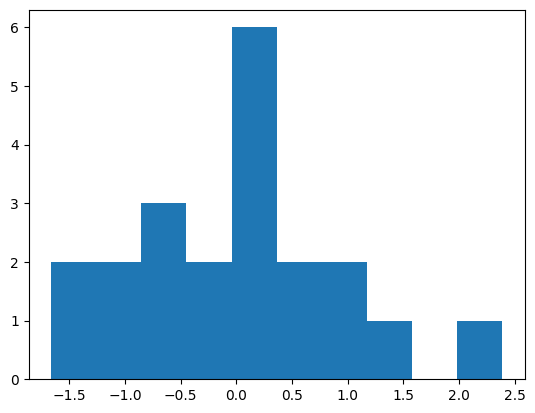

In [27]:
plt.hist(model3.resid_pearson)

In [28]:
np.mean(model_quad.resid_pearson)

1.0404375773630038e-14

### Sqrt log model

In [29]:
data['Sorting_sqrt'] = np.sqrt(data.Sorting)
data

,Delivery,Sorting,Sorting_sq,Sorting_sqrt
0,21.00,10,100,3.162278
1,13.50,4,16,2.000000
2,19.75,6,36,2.449490
3,24.00,9,81,3.000000
4,29.00,10,100,3.162278
5,15.35,6,36,2.449490
6,19.00,7,49,2.645751
7,9.50,3,9,1.732051
8,17.90,10,100,3.162278
9,18.75,9,81,3.000000


In [32]:
model_sqrt = smf.ols('np.log(Delivery)~Sorting+Sorting_sqrt', data = data).fit()

In [33]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     31.04
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.46e-06
Time:                        12:27:19   Log-Likelihood:                 10.434
No. Observations:                  21   AIC:                            -14.87
Df Residuals:                      18   BIC:                            -11.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4420      0.746      0.593      0.561      -1.125       2.009
Sorting         -0.2016      0.136     -1.482      0.156      -0.488       0.084
Sorting_sqrt     1.4719      0.649      2.269      0.036       0.109       2.835
==============================================================================
Omnibus:                        1.879   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.268
Skew:                           0.596   Prob(JB):                        0.531
Kurtosis:                       2.832   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------------
**This model has crossed the target r-squared value. The new value is 0.775**

In [35]:
pred5 = np.exp(model_sqrt.predict(data))
rmse5 = np.sqrt(mean_squared_error(data['Delivery'], pred5))
rmse5

2.7573470204779245

Text(0, 0.5, 'Delivery Time')

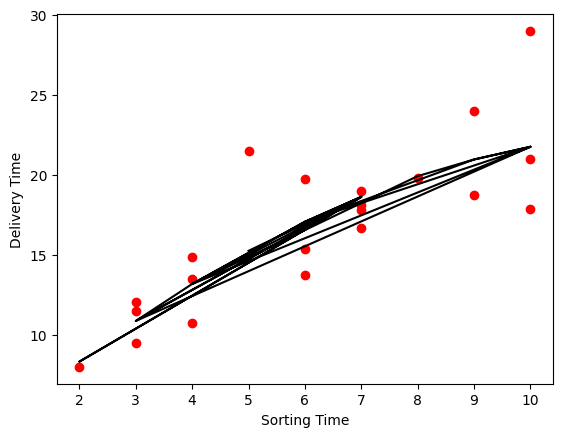

In [36]:
plt.scatter(data['Sorting'], data['Delivery'], color = 'red')
plt.plot(data['Sorting'], pred5, color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

(array([3., 4., 0., 5., 3., 1., 3., 0., 0., 2.]),
 array([-1.36091051, -1.00907675, -0.65724298, -0.30540922,  0.04642454,
         0.39825831,  0.75009207,  1.10192584,  1.4537596 ,  1.80559337,
         2.15742713]),
 <BarContainer object of 10 artists>)

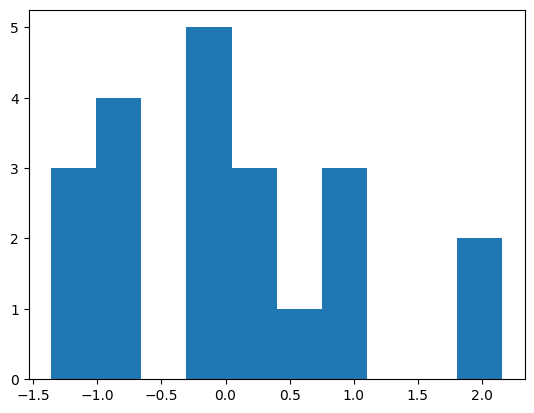

In [37]:
plt.hist(model_sqrt.resid_pearson)

In [38]:
np.mean(model_sqrt.resid_pearson)

7.2957513046796e-15

### Cbrt log model

In [39]:
data['Sorting_cbrt'] = np.cbrt(data.Sorting)
data

,Delivery,Sorting,Sorting_sq,Sorting_sqrt,Sorting_cbrt
0,21.00,10,100,3.162278,2.154435
1,13.50,4,16,2.000000,1.587401
2,19.75,6,36,2.449490,1.817121
3,24.00,9,81,3.000000,2.080084
4,29.00,10,100,3.162278,2.154435
5,15.35,6,36,2.449490,1.817121
6,19.00,7,49,2.645751,1.912931
7,9.50,3,9,1.732051,1.442250
8,17.90,10,100,3.162278,2.154435
9,18.75,9,81,3.000000,2.080084


In [44]:
model_cbrt = smf.ols('np.log(Delivery)~Sorting+Sorting_cbrt', data = data).fit()

In [45]:
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     31.21
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.41e-06
Time:                        12:31:37   Log-Likelihood:                 10.477
No. Observations:                  21   AIC:                            -14.95
Df Residuals:                      18   BIC:                            -11.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3917      1.101     -0.356      0.726      -2.705       1.922
Sorting         -0.1231      0.101     -1.221      0.238      -0.335       0.089
Sorting_cbrt     2.1833      0.953      2.290      0.034       0.180       4.186
==============================================================================
Omnibus:                        1.797   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.205
Skew:                           0.581   Prob(JB):                        0.547
Kurtosis:                       2.832   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------------
**This model has crossed the target r-squared value. The new value is 0.776**

In [46]:
pred6 = np.exp(model_cbrt.predict(data))
rmse6 = np.sqrt(mean_squared_error(data['Delivery'], pred6))
rmse6

2.752474771555105

Text(0, 0.5, 'Delivery Time')

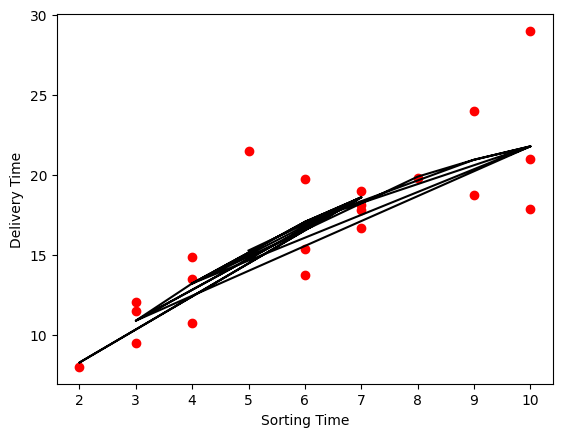

In [47]:
plt.scatter(data['Sorting'], data['Delivery'], color = 'red')
plt.plot(data['Sorting'], pred6, color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

(array([3., 4., 0., 5., 3., 2., 2., 0., 0., 2.]),
 array([-1.36164881, -1.01012544, -0.65860206, -0.30707869,  0.04444468,
         0.39596806,  0.74749143,  1.0990148 ,  1.45053817,  1.80206155,
         2.15358492]),
 <BarContainer object of 10 artists>)

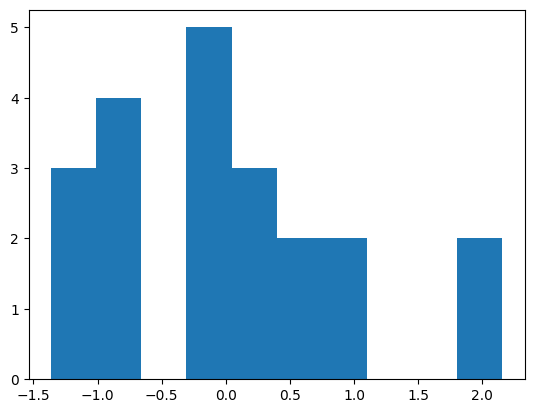

In [48]:
plt.hist(model_cbrt.resid_pearson)

In [49]:
np.mean(model_cbrt.resid_pearson)

-8.649166039460743e-15

### Cbrt plus Sqrt log model

In [50]:
model_cbrt_sqrt = smf.ols('np.log(Delivery)~Sorting+Sorting_sqrt+Sorting_cbrt', data = data).fit()

In [51]:
model_cbrt_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     20.13
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           7.83e-06
Time:                        12:33:44   Log-Likelihood:                 10.673
No. Observations:                  21   AIC:                            -13.35
Df Residuals:                      17   BIC:                            -9.167
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.1519     13.758     -0.593      0.561     -37.179      20.875
Sorting          0.6410      1.354      0.473      0.642      -2.216       3.498
Sorting_sqrt   -14.0135     24.762     -0.566      0.579     -66.256      38.229
Sorting_cbrt    22.8163     36.471      0.626      0.540     -54.131      99.763
==============================================================================
Omnibus:                        1.001   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.654
Skew:                           0.420   Prob(JB):                        0.721
Kurtosis:                       2.796   Cond. No.                     9.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

------------------
**This model has crossed the target r-squared value. The new value is 0.780. This is the highest so far**

In [52]:
pred7 = np.exp(model_cbrt_sqrt.predict(data))
rmse7 = np.sqrt(mean_squared_error(data['Delivery'], pred7))
rmse7

2.716069151627101

Text(0, 0.5, 'Delivery Time')

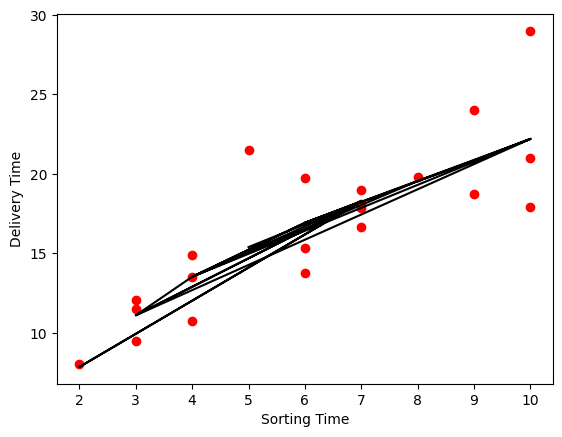

In [53]:
plt.scatter(data['Sorting'], data['Delivery'], color = 'red')
plt.plot(data['Sorting'], pred7, color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

(array([3., 1., 3., 3., 5., 2., 2., 0., 1., 1.]),
 array([-1.41441973, -1.06607412, -0.7177285 , -0.36938288, -0.02103727,
         0.32730835,  0.67565396,  1.02399958,  1.3723452 ,  1.72069081,
         2.06903643]),
 <BarContainer object of 10 artists>)

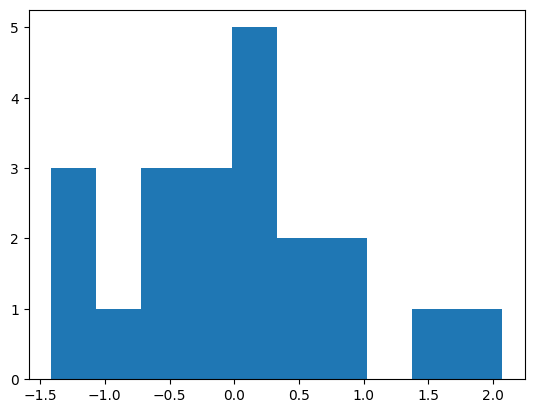

In [54]:
plt.hist(model_cbrt_sqrt.resid_pearson)

In [55]:
np.mean(model_cbrt_sqrt.resid_pearson)

3.3165005133707297e-13

--------------

The model with square root and the cube root of the sorting time has the highest r-squared value among all the models.